# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

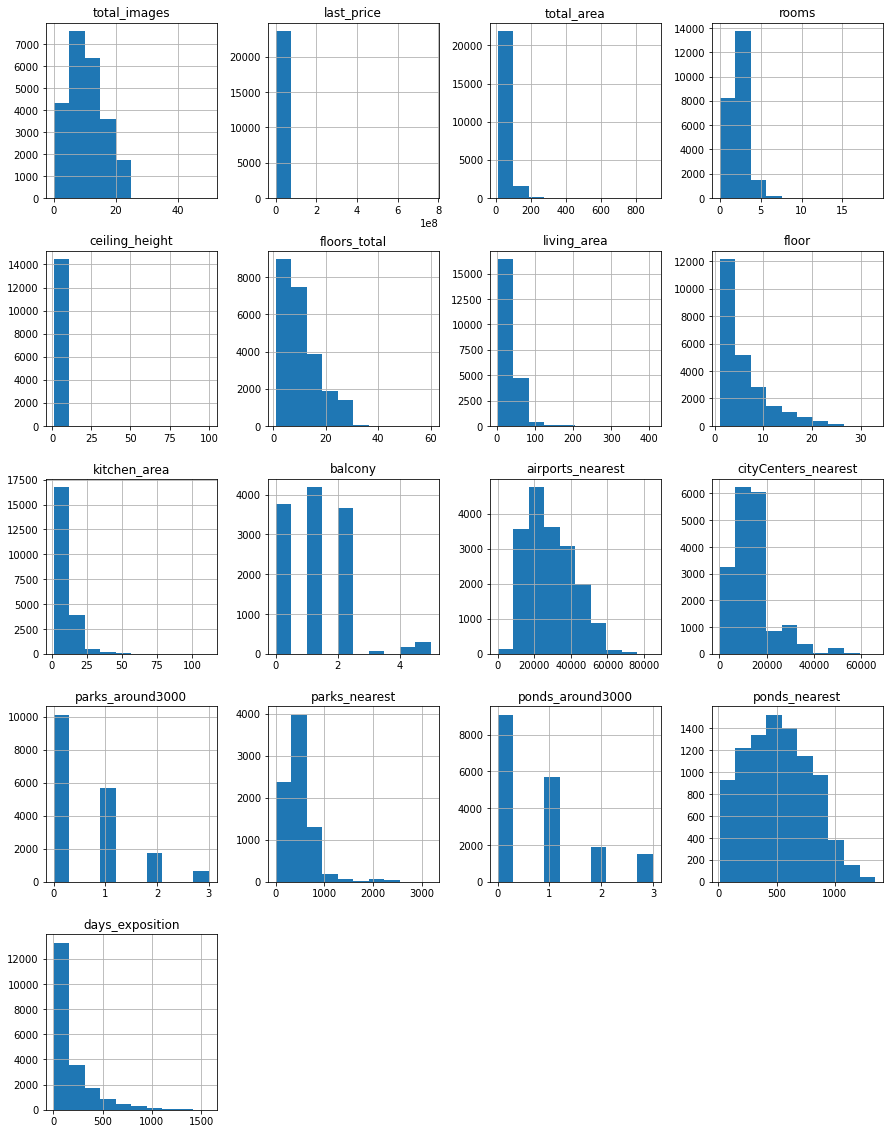

In [3]:
data.hist(figsize=(15, 20));

Изучив общую информацию можно заметить что в данных имеются пропуски, а также аномалии - выделяющиеся значения. С нии нужно будет поработать.

### Предобработка данных

#### Найдите и изучите пропущенные значения в столбцах:

**Названия столбцов:**

total_images — число фотографий квартиры в объявлении

last_price — цена на момент снятия с публикации

total_area — общая площадь квартиры в квадратных метрах (м²)

first_day_exposition — дата публикации

rooms — число комнат

ceiling_height — высота потолков (м)

floors_total — всего этажей в доме

living_area — жилая площадь в квадратных метрах (м²)

floor — этаж

is_apartment — апартаменты (булев тип)

studio — квартира-студия (булев тип)

open_plan — свободная планировка (булев тип)

kitchen_area — площадь кухни в квадратных метрах (м²)

balcony — число балконов

locality_name — название населённого пункта

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

cityCenters_nearest — расстояние до центра города (м)

parks_around3000 — число парков в радиусе 3 км

parks_nearest — расстояние до ближайшего парка (м)

ponds_around3000 — число водоёмов в радиусе 3 км

ponds_nearest — расстояние до ближайшего водоёма (м)

days_exposition — сколько дней было размещено объявление (от публикации до снятия)

In [4]:
print(data.isna().sum())
# Найдем пропуски в столбцах

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


Видно что в данных достаточно много пропусков. Их можно пока заменить заглушкой, а дальше учесть это при работе с данными.

In [5]:
data['balcony'] = data['balcony'].fillna(0)
# Заполняем пропуски заглушкой -1 в balcony

In [6]:
data['airports_nearest'] = data['airports_nearest'].fillna(-1)
# Заполняем пропуски заглушкой -1 в airports_nearest

In [7]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(-1)
# Заполняем пропуски заглушкой -1 в cityCenters_nearest

In [8]:
data['parks_around3000'] = data['parks_around3000'].fillna(-1)
# Заполняем пропуски заглушкой -1 в parks_around3000

In [9]:
data['parks_nearest'] = data['parks_nearest'].fillna(-1)
# Заполняем пропуски заглушкой -1 в parks_nearest

In [10]:
data['ponds_around3000'] = data['parks_around3000'].fillna(-1)
# Заполняем пропуски заглушкой -1 в ponds_around3000

In [11]:
data['ponds_nearest'] = data['ponds_nearest'].fillna(-1)
# Заполняем пропуски заглушкой -1 в ponds_nearest

In [12]:
def ceiling_height(height):
    if height > 10:
        return height /10
    elif height < 2:
        return 2
    else:
        return height
data['ceiling_height'] = data['ceiling_height'].apply(ceiling_height)

In [13]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())


In [14]:
data['ceiling_height']

0        2.70
1        2.65
2        2.65
3        2.65
4        3.03
         ... 
23694    3.70
23695    2.65
23696    2.65
23697    3.00
23698    2.50
Name: ceiling_height, Length: 23699, dtype: float64

In [15]:
data['ceiling_height'].isna().sum()

0

In [16]:
ratio_living_area = data['total_area'] / (data['total_area'].median() / data['living_area'].median())
data['living_area'] = data['living_area'].fillna(ratio_living_area)
# Найдем соотношение медианной общей площади к медианной жилой. А затем, заполнить пропуски  отношением общей площади к найденному соотношению.

In [17]:
data['living_area'].isna().sum()

0

In [18]:
ratio_kitchen_area = data['total_area'] / (data['total_area'].median() / data['kitchen_area'].median())
data['kitchen_area'] = data['kitchen_area'].fillna(ratio_kitchen_area)
# Найдем соотношение медианной общей площади к медианной площади кухни. А затем, заполнить пропуски  отношением общей площади к найденному соотношению.

In [19]:
data['kitchen_area'].isna().sum()

0

In [20]:
data['locality_name'] = data['locality_name'].fillna('noname')
# Заменяем пропуски в locality_name на noname

In [21]:
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest            0
cityCenters_nearest         0
parks_around3000            0
parks_nearest               0
ponds_around3000            0
ponds_nearest               0
days_exposition          3181
dtype: int64


**Причины пропусков в данных**

Пропуски могут возникнуть в результате ошибки ввода данных, нежелания вводить эти данные, или технический фактор (например, ошибка при выгрузке).

В значении is_apartment видим большое количество пропусков, вероятнее всего из за неверного типа данных, изменим его в следующем шаге.

#### Рассмотрите типы данных в каждом столбце, при необходимости измените их:

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

In [23]:
data['is_apartment'] = data['is_apartment'].fillna(False)
# Преобразовываем строковые данные в булевы

In [24]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
# Меняем формат данных для дат

In [25]:
print(data.isna().sum())

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total              86
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3181
dtype: int64


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

Замена типов делается для оптимизции хранения памяти и для того, чтобы графики  воспринимали их в правильном виде.

#### Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты

In [27]:
data['locality_name'].nunique()

365

In [28]:
data['locality_name'].sort_values().unique()

array(['noname', 'Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск',
       'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород',
       'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино',
       'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово',
       'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'городской поселок Большая Ижора',
       'городской поселок Янино-1', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'городс

В столбце locality_name видим много повторяющихся названий и неявных дубликатов. Нужно обработать эти значения.

In [29]:
names = ['поселок ', 'деревня ', 'посёлок ', 'поселок городского типа ', 'городского типа ', 'городской ', 
    'садовое товарищество ', 'садоводческое некоммерческое товарищество ', 'село', 'станции ', 'коттеджный']
name = ''
for a in names:
    data['locality_name'] = data['locality_name'].str.replace(a, name).str.strip()
data['locality_name'].sort_values().unique()

array(['noname', 'Агалатово', 'Александровская', 'Алексеевка', 'Аннино',
       'Аро', 'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпосёлок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород'

In [30]:
data['locality_name'].nunique()

308

Данные в locality_name приведены в читаемый вид и готовы к дальнейшей обработке.

#### Найдите и устраните редкие и выбивающиеся значения

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

In [32]:
data=data[data['last_price'] >= 400000]
# В столбце о стоимости квартиры ткже были слишком низкие значения стоимости, решил их удалить

In [33]:
data=data[data['rooms'] < 9 ]
# Квартиры с количеством комнат больше 9 считаю аномальными, и для более четкого отображения статистики решил их удалить

In [34]:
data=data[data['days_exposition'] > 2]
# Удаляю квартиры которые продавались менее 2 дней, они скорее всего имеют нерыночные условия продаж, либо являются обманными, ошибочными и тп.

In [35]:
data=data[data['total_area'] <= 250]
# Площади квартир выше 250 кв.м считаю аномальными, и для более четкого отображения статистики решил их удалить

Чтобы редкие и аномальные значения не нарушали общую статистику и позволили более точно провести исследование, было принято решение удалить их.

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20420 entries, 1 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20420 non-null  int64         
 1   last_price            20420 non-null  float64       
 2   total_area            20420 non-null  float64       
 3   first_day_exposition  20420 non-null  datetime64[ns]
 4   rooms                 20420 non-null  int64         
 5   ceiling_height        20420 non-null  float64       
 6   floors_total          20344 non-null  float64       
 7   living_area           20420 non-null  float64       
 8   floor                 20420 non-null  int64         
 9   is_apartment          20420 non-null  bool          
 10  studio                20420 non-null  bool          
 11  open_plan             20420 non-null  bool          
 12  kitchen_area          20420 non-null  float64       
 13  balcony         

### Посчитайте и добавьте в таблицу новые столбцы

#### Цена одного квадратного метра:

In [37]:
data['price_per_meter'] = data['last_price'] / data['total_area']
data['price_per_meter'].head() 
# Добавляем в таблицу столбец с ценой одного квадратного метра

1     82920.792079
2     92785.714286
3    408176.100629
4    100000.000000
5     95065.789474
Name: price_per_meter, dtype: float64

#### День недели публикации объявления (0 — понедельник, 1 — вторник и так далее)

In [38]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['weekday'].head()
# Добавляем в таблицу столбец с днем недели публикации объявления

1    1
2    3
3    4
4    1
5    0
Name: weekday, dtype: int64

#### Месяц публикации объявления

In [39]:
data['month_publication'] = data['first_day_exposition'].dt.month
data['month_publication'].head() 
# Добавляем в таблицу столбец с месяцем публикации объявления

1    12
2     8
3     7
4     6
5     9
Name: month_publication, dtype: int64

#### Год публикации объявления

In [40]:
data['year_publication'] = data['first_day_exposition'].dt.year
data['year_publication'].head()
# Добавляем в таблицу столбец с годом публикации объявления

1    2018
2    2015
3    2015
4    2018
5    2018
Name: year_publication, dtype: int64

#### Тип этажа квартиры (значения — «‎первый», «последний», «другой») 

In [41]:
def floor_name(row):
    floor = row ['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor != 1:
        if floor == floors_total:
            return 'последний'
        return 'другой'
data['floor_category'] = data.apply(floor_name, axis=1)
data['floor_category'].head()

1    первый
2    другой
3    другой
4    другой
5    другой
Name: floor_category, dtype: object

Произведена сортировка всех этажей в домах по трем типам: «‎первый», «последний», «другой»

#### Расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)

In [42]:
data['cityCenters_nearest'].head()

1    18603.0
2    13933.0
3     6800.0
4     8098.0
5       -1.0
Name: cityCenters_nearest, dtype: float64

In [43]:
data['distance'] = (data['cityCenters_nearest'] / 1000).astype('int')
data['distance'].head()

1    18
2    13
3     6
4     8
5     0
Name: distance, dtype: int64

Для удобства дальнейших вычислений расстояния от дома до центра города было переведено в километры и округлены до целых значений.

### Проведите исследовательский анализ данных

#### Изучение параметров объектов:

##### Распределение общей площади

Text(0, 0.5, 'Количество квартир')

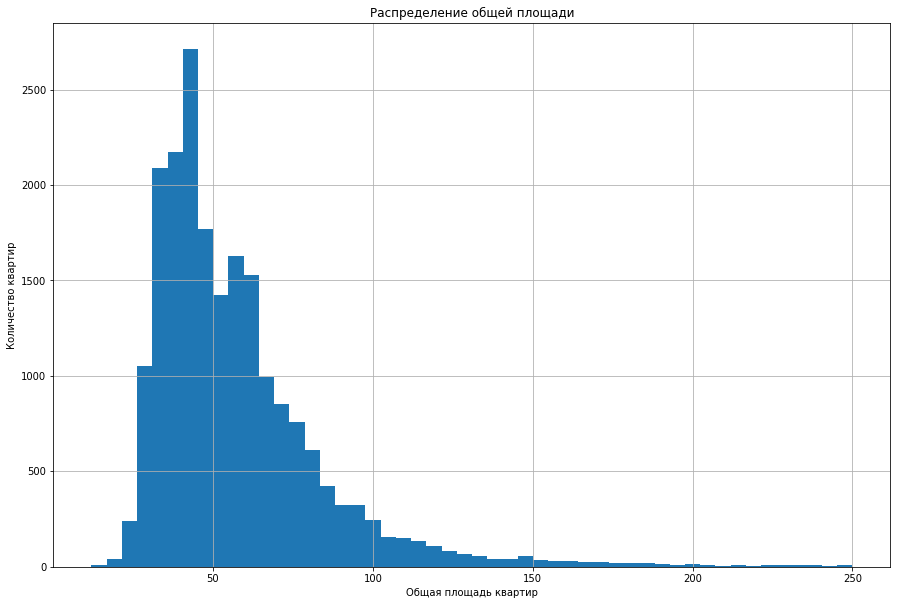

In [44]:
import matplotlib.pyplot as plt
data['total_area'].hist(bins=50, figsize=(15,10)).set_title('Распределение общей площади')
plt.xlabel('Общая площадь квартир')
plt.ylabel('Количество квартир')

##### Распределение жилой площади

Text(0, 0.5, 'Количество квартир')

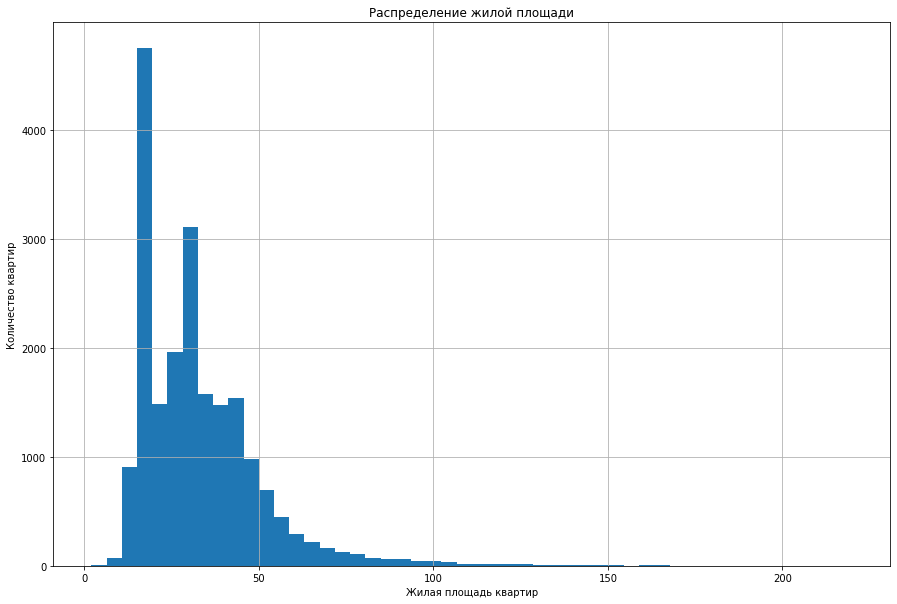

In [45]:
data.query('living_area != -1')['living_area'].hist(bins=50, figsize=(15,10)).set_title('Распределение жилой площади')
plt.xlabel('Жилая площадь квартир')
plt.ylabel('Количество квартир')

##### Распределение площади кухни

Text(0, 0.5, 'Количество кухонь')

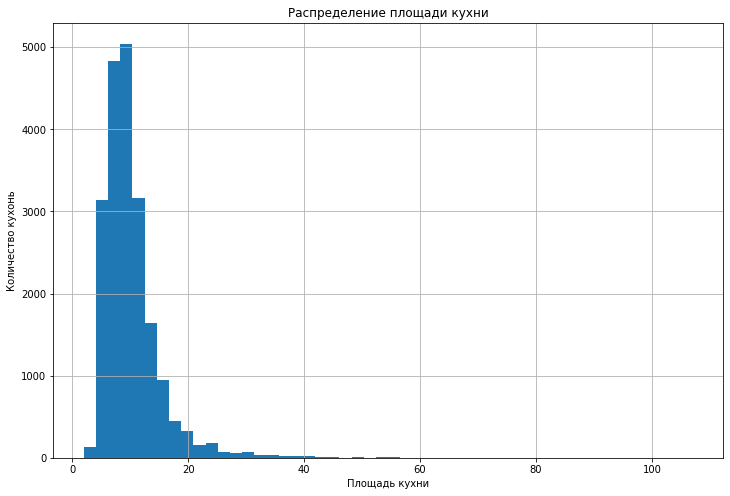

In [46]:
data.query('kitchen_area != -1')['kitchen_area'].hist(bins=50, figsize=(12,8)).set_title('Распределение площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Количество кухонь')

##### Цена объекта

Text(0, 0.5, 'Количество квартир')

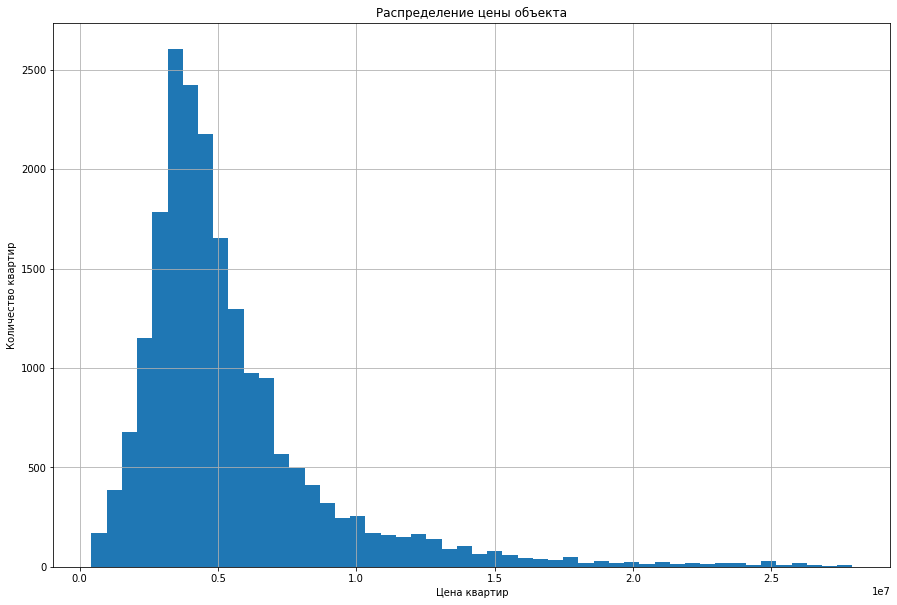

In [47]:
data=data[data['last_price'] < data['last_price'].quantile(0.99)]
data['last_price'].hist(bins=50, figsize=(15,10)).set_title('Распределение цены объекта')
plt.xlabel('Цена квартир')
plt.ylabel('Количество квартир')

##### Количество комнат

Text(0, 0.5, 'Количество квартир')

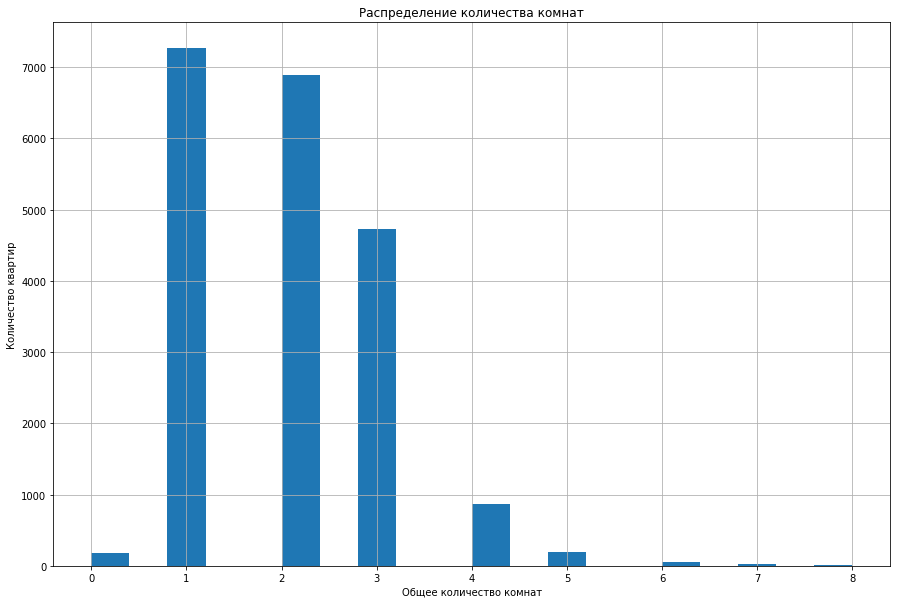

In [48]:
data['rooms'].hist(bins=20, figsize=(15,10)).set_title('Распределение количества комнат')
plt.xlabel('Общее количество комнат')
plt.ylabel('Количество квартир')

##### Высота потолков

Text(0, 0.5, 'Количество квартир')

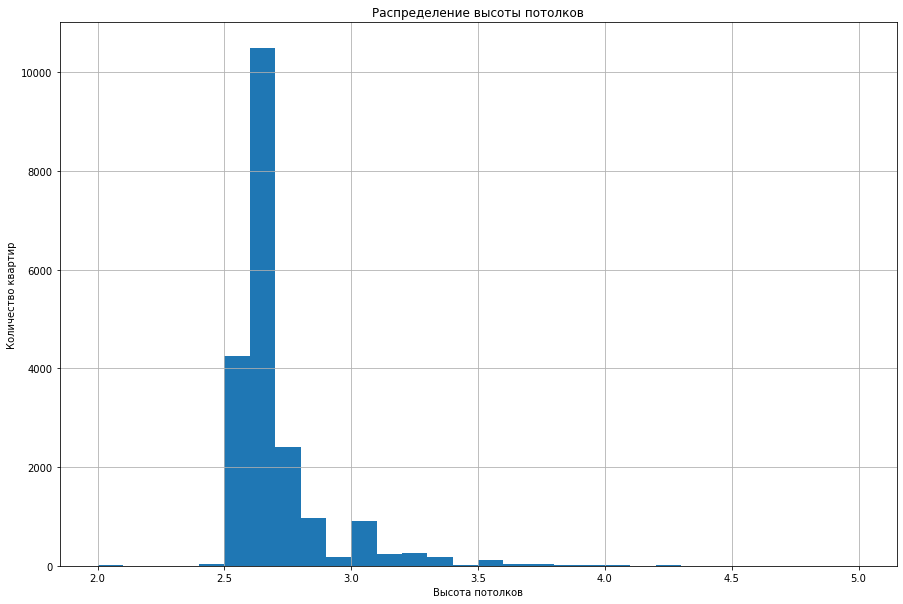

In [49]:
data['ceiling_height'].hist(range = (2, 5), bins=30, figsize=(15,10)).set_title('Распределение высоты потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество квартир')

##### Этаж квартиры

Text(0, 0.5, 'Количество квартир')

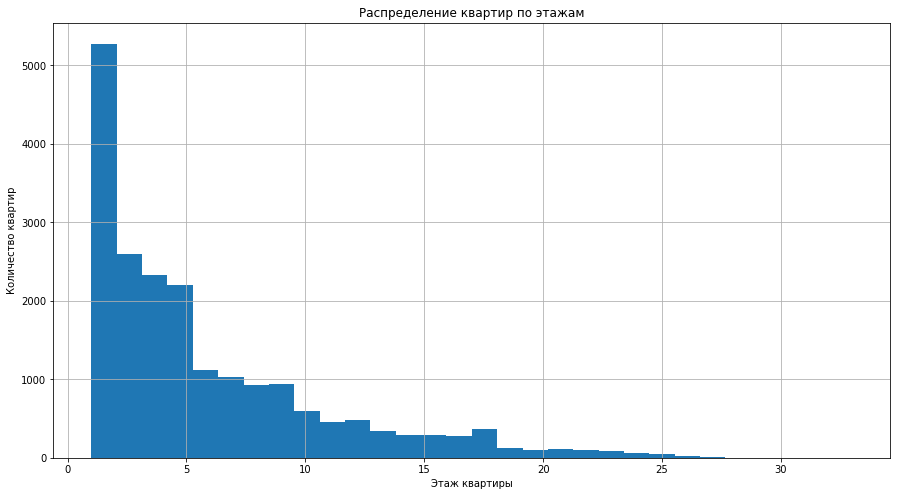

In [50]:
data['floor'].hist(bins=30, figsize=(15,8)).set_title('Распределение квартир по этажам')
plt.xlabel('Этаж квартиры')
plt.ylabel('Количество квартир')

##### Тип этажа квартиры

Text(0, 0.5, 'Количество квартир')

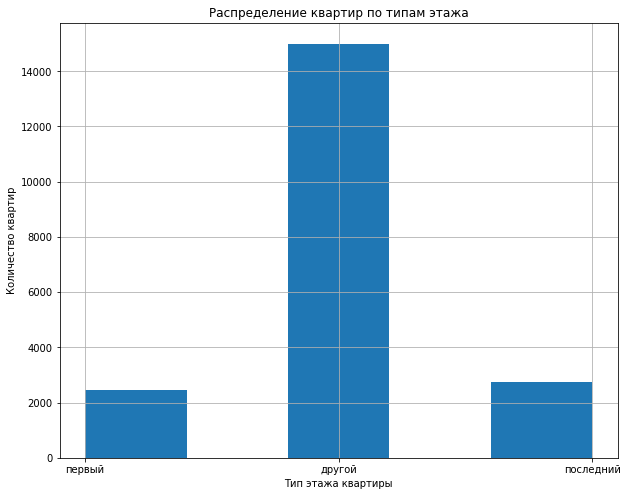

In [51]:
data['floor_category'].hist(bins=5, figsize=(10,8)).set_title('Распределение квартир по типам этажа')
plt.xlabel('Тип этажа квартиры')
plt.ylabel('Количество квартир')

##### Общее количество этажей в доме

Text(0, 0.5, 'Количество квартир')

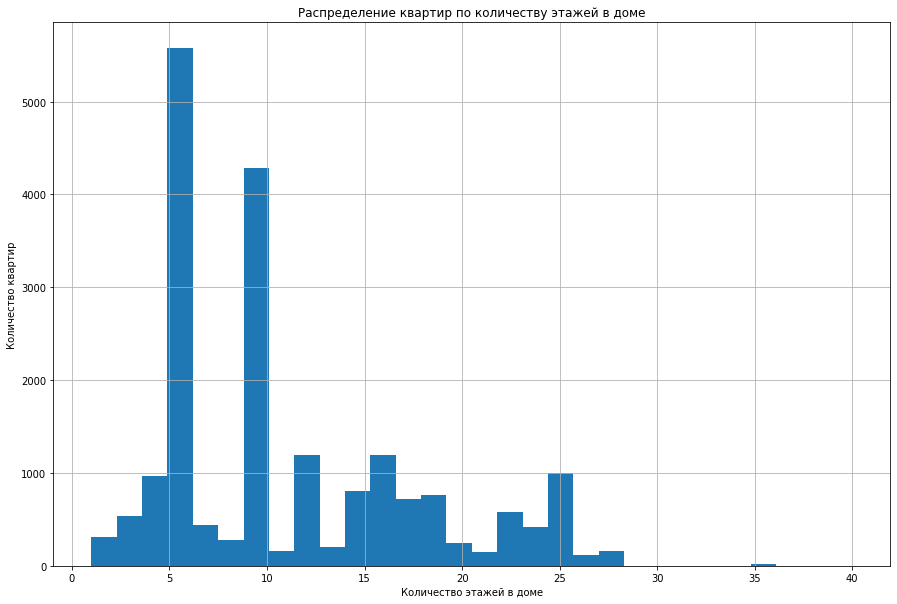

In [52]:
data['floors_total'].hist(range = (1, 40), bins=30, figsize=(15,10)).set_title('Распределение квартир по количеству этажей в доме')
plt.xlabel('Количество этажей в доме')
plt.ylabel('Количество квартир')

##### Расстояние до центра города в метрах

Text(0, 0.5, 'Количество квартир')

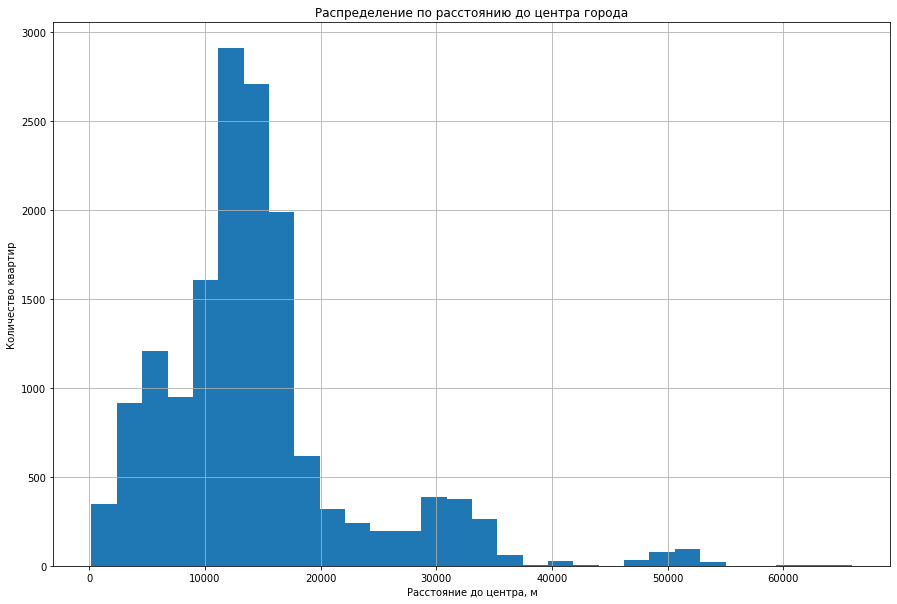

In [53]:
data.query('cityCenters_nearest != -1')['cityCenters_nearest'].hist(bins=30, figsize=(15,10)).set_title('Распределение по расстоянию до центра города')
plt.xlabel('Расстояние до центра, м')
plt.ylabel('Количество квартир')

##### Расстояние до ближайшего аэропорта

Text(0, 0.5, 'Количество квартир')

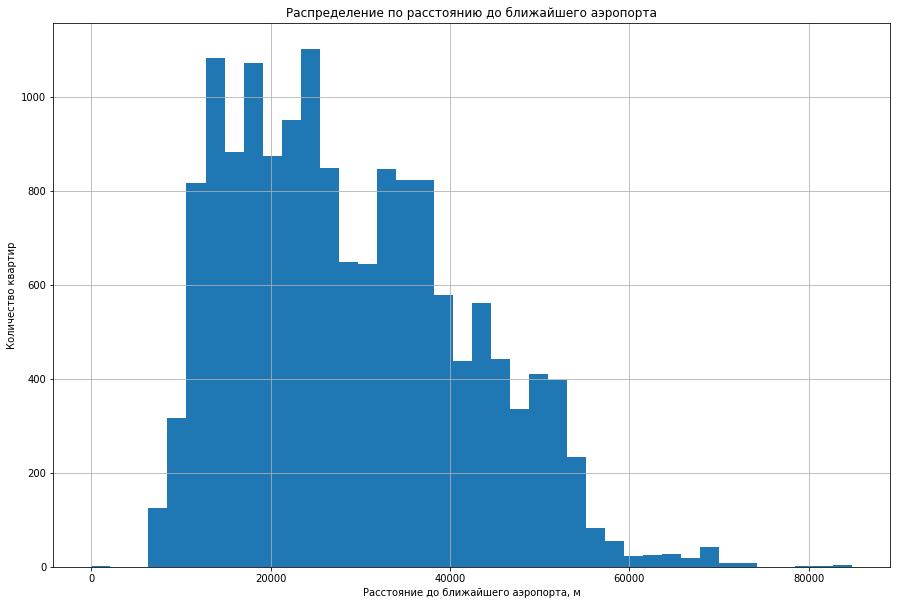

In [54]:
data.query('airports_nearest != -1')['airports_nearest'].hist(bins=40, figsize=(15,10)).set_title('Распределение по расстоянию до ближайшего аэропорта')
plt.xlabel('Расстояние до ближайшего аэропорта, м')
plt.ylabel('Количество квартир')

##### Расстояние до ближайшего парка

Text(0, 0.5, 'Количество квартир')

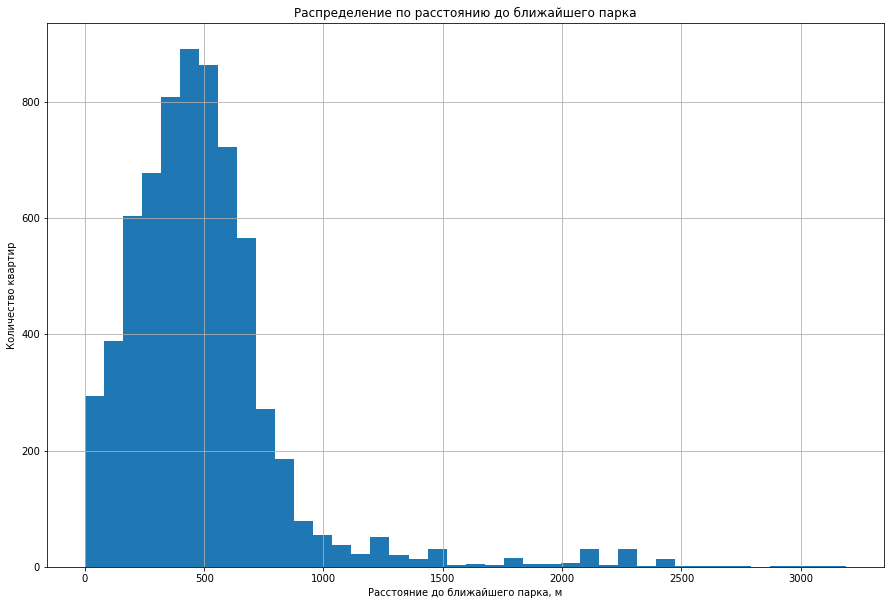

In [55]:
data.query('parks_nearest != -1')['parks_nearest'].hist(bins=40, figsize=(15,10)).set_title('Распределение по расстоянию до ближайшего парка')
plt.xlabel('Расстояние до ближайшего парка, м')
plt.ylabel('Количество квартир')

##### Месяц публикации объявления

Text(0, 0.5, 'Количество объявлений')

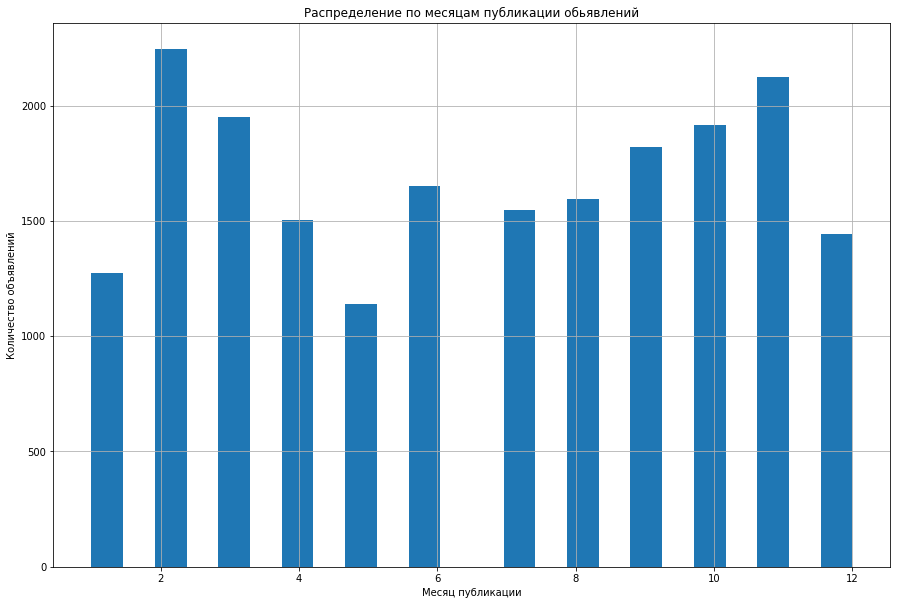

In [56]:
data['month_publication'].hist(bins=24, figsize=(15,10)).set_title('Распределение по месяцам публикации обьявлений')
plt.xlabel('Месяц публикации')
plt.ylabel('Количество объявлений')

##### День публикации объявления

Text(0, 0.5, 'Количество объявлений')

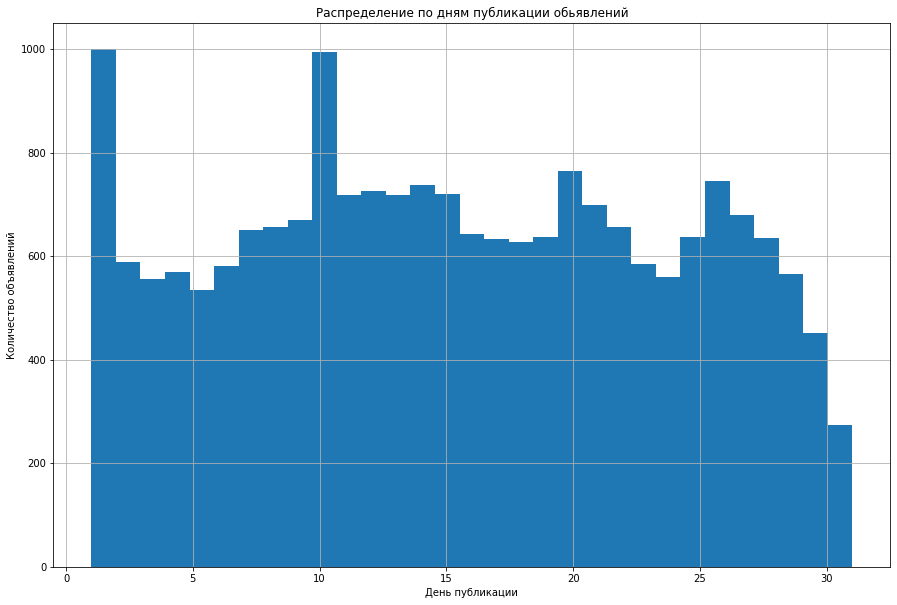

In [57]:
data['day_publication'] = data['first_day_exposition'].dt.day
data['day_publication'].hist(bins=31, figsize=(15,10)).set_title('Распределение по дням публикации обьявлений')
plt.xlabel('День публикации')
plt.ylabel('Количество объявлений')

Изучив параметры можно сказать что не все из них тесно взаимосвязаны друг с другом. Но в целом видно что количество квартир уменьшается с ростом площади, увеличением количества комнат и цены. Самые популярные дома это в 5 и в 9 этажей. Чем выше этаж дома тем меньше предлагается квартир.

#### Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление. 

Text(0, 0.5, 'Количество объявлений')

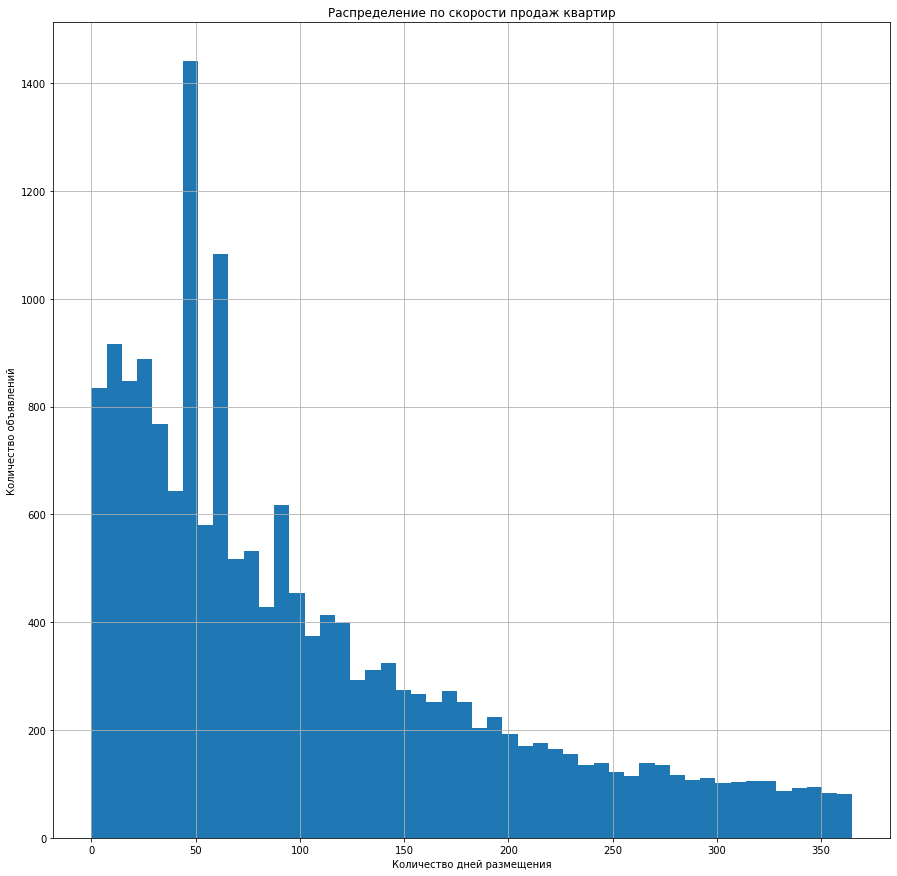

In [58]:
data['days_exposition'].hist(range = (0, 365), bins=50, figsize=(15,15)).set_title('Распределение по скорости продаж квартир')
plt.xlabel('Количество дней размещения')
plt.ylabel('Количество объявлений')

На графике мы видим пики 45, 60 и 90. Они указывают на автоматическое снятие объявления агрегатором - так как они не являются фактической продажей, их стоит удалить, как выбросы.

In [59]:
data['days_exposition'] = pd.to_numeric(data['days_exposition'] ,errors='coerce', downcast='integer')
# Приведем столбец к целочисленному типу

data = data.query('days_exposition != 45 and days_exposition != 60 and days_exposition != 90')
# Удалим выбросы

Text(0, 0.5, 'Количество объявлений')

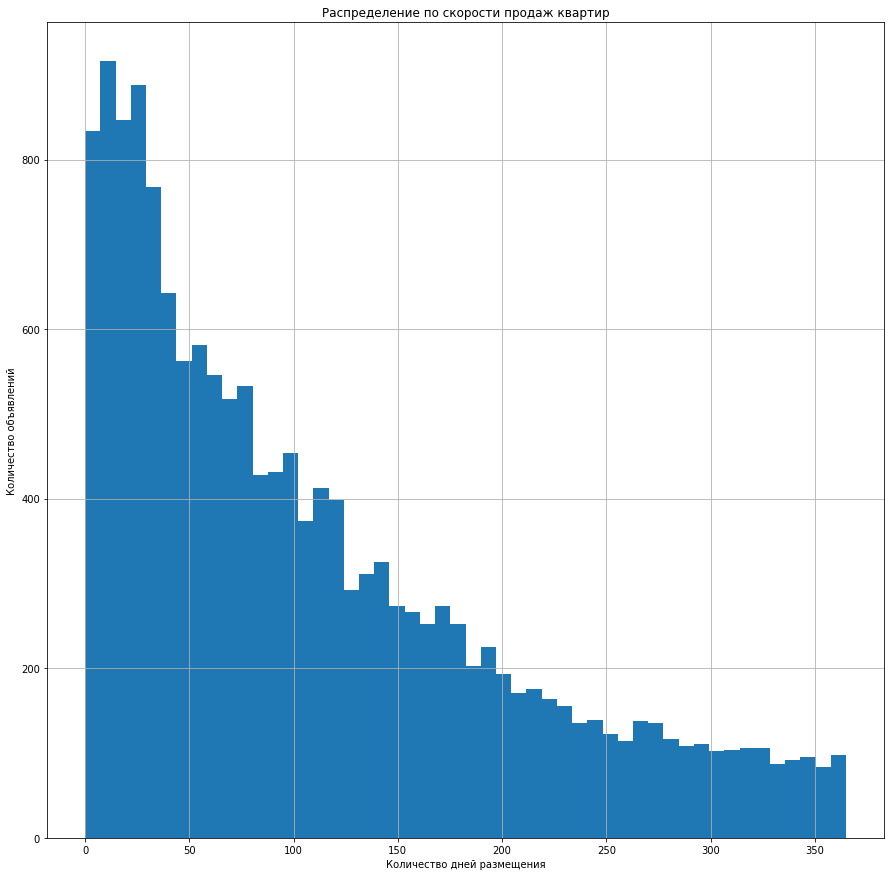

In [60]:
data['days_exposition'].hist(range = (0, 365), bins=50, figsize=(15,15)).set_title('Распределение по скорости продаж квартир')
plt.xlabel('Количество дней размещения')
plt.ylabel('Количество объявлений')

<AxesSubplot:xlabel='year_publication'>

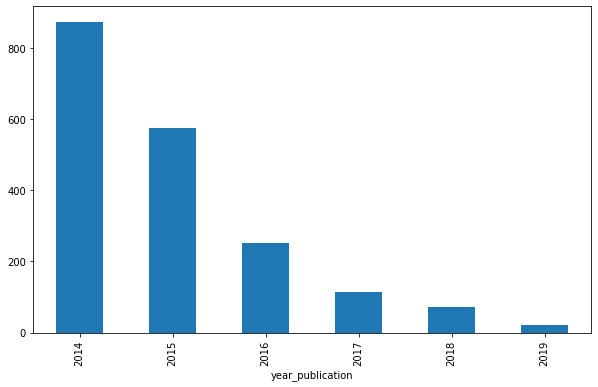

In [61]:
data.groupby('year_publication')['days_exposition'].median().plot(kind='bar', figsize = (10,6))

In [62]:
pd.options.display.float_format ='{:,.0f}'.format
data.pivot_table(index ='year_publication', values = 'days_exposition', aggfunc=['median', 'mean', 'sum', 'count'])

,median,mean,sum,count
,days_exposition,days_exposition,days_exposition,days_exposition
year_publication,,,,
2014,872,908,"101,671",112
2015,575,646,"699,729",1083
2016,252,331,"841,984",2543
2017,115,166,"1,200,081",7236
2018,73,99,"659,088",6650
2019,21,29,"28,717",983


<AxesSubplot:xlabel='year_publication'>

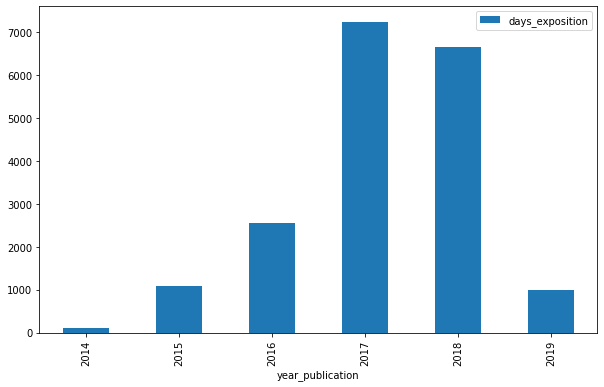

In [63]:
data.pivot_table(index ='year_publication', values = 'days_exposition', aggfunc='count').plot(kind='bar', figsize = (10,6))

In [64]:
data['days_exposition'].describe()

count   18,607
mean       190
std        224
min          3
25%         41
50%        109
75%        249
max      1,580
Name: days_exposition, dtype: float64

Скорость продаж менялась в зависимости от года публикации обьявления, как и количество размещаемых обьявлений. Быстрые и короткие продажи менялись год от года. 
Среднее значение продаж - 190 дней, медианное значение продаж - 109 дней. 
Быстрыми можно считать продажи менее 41 дня, необычно долгими - более 249 дней.

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

##### Зависимость цены квартиры от количества комнат

In [65]:
price_room = data.pivot_table(index ='rooms', values = 'last_price', aggfunc='median').reset_index()
display(price_room)

,rooms,last_price
0,0,"2,700,000"
1,1,"3,590,000"
2,2,"4,700,000"
3,3,"6,000,000"
4,4,"8,400,000"
5,5,"11,500,000"
6,6,"16,000,000"
7,7,"16,300,000"
8,8,"18,000,000"


<AxesSubplot:xlabel='last_price'>

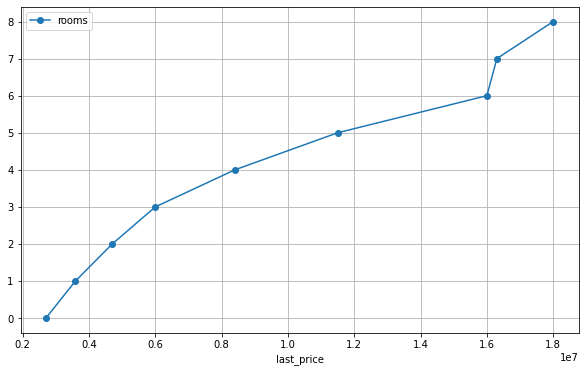

In [66]:
price_room.plot(y='rooms', x= 'last_price', grid=True, style='o-', figsize = (10,6))

In [67]:
price_room['last_price'].corr(price_room['rooms'])

0.979493663658329

Коэффициент корреляции Пирсона = 0.98 и по графику мы видим что цена растет с увеличением комнат в квартире.

##### Зависимость цены квартиры от общей площади

In [68]:
price_total_area = data.pivot_table(index ='total_area', values = 'last_price', aggfunc='median').reset_index()
display(price_total_area)

,total_area,last_price
0,12,"2,400,000"
1,13,"1,850,000"
2,13,"1,686,000"
3,14,"1,190,000"
4,15,"1,550,000"
...,...,...
1801,239,"17,900,000"
1802,245,"18,000,000"
1803,248,"16,000,000"
1804,249,"24,900,000"


In [69]:
price_total_area['last_price'].corr(price_total_area['total_area'])

0.8681165981274253

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

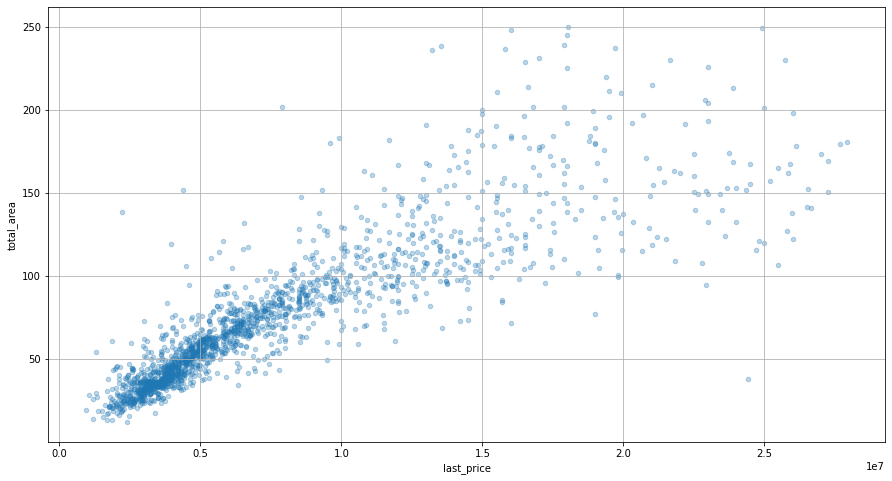

In [70]:
price_total_area.plot(x='last_price', y='total_area', kind='scatter', alpha=0.3, figsize = (15,8), grid=True)

Коэффициент корреляции Пирсона = 0.86 и по графику мы видим что цена растет с увеличением общей площади в квартире. Есть некотороые единичные значения которые чуть выбиваются из общего потока, но скорее всего на это влияют какие либо особые факторы: срочность продажи, состояние квартиры и пр.

##### Зависимость цены квартиры от жилой площади

In [71]:
data=data[data['living_area'] != -1]
price_living_area = data.pivot_table(index ='living_area', values = 'last_price', aggfunc='median').reset_index()
display(price_living_area)

,living_area,last_price
0,2,"4,340,000"
1,3,"4,440,000"
2,5,"2,680,000"
3,5,"6,100,000"
4,6,"3,799,000"
...,...,...
1907,166,"19,700,000"
1908,167,"16,000,000"
1909,171,"17,000,000"
1910,177,"15,800,000"


In [72]:
price_living_area['last_price'].corr(price_living_area['living_area'])

0.7933092496484984

<AxesSubplot:xlabel='last_price', ylabel='living_area'>

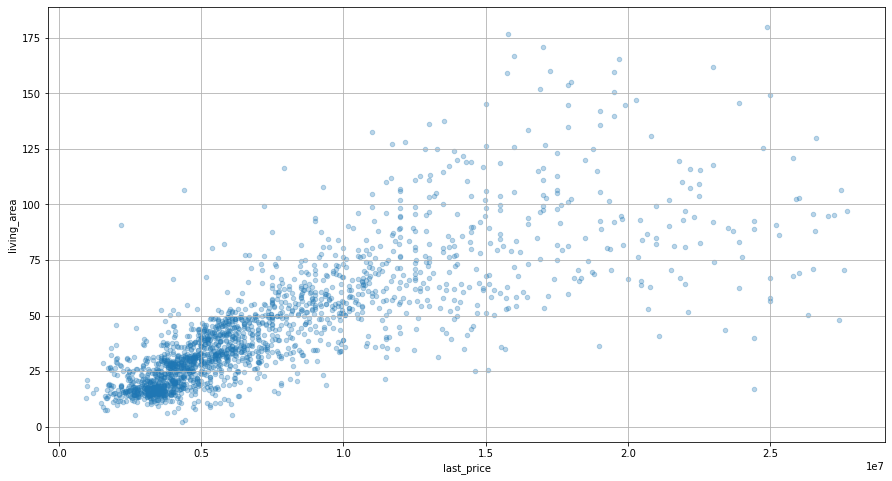

In [73]:
price_living_area.plot(x='last_price', y='living_area', kind='scatter', alpha=0.3, figsize = (15,8), grid=True)

Коэффициент корреляции Пирсона = 0.79 и по графику мы видим что цена растет с увеличением жилой площади в квартире. Но разброс уже чуть больше по сравнению с графиком общей площади. Значит взаимосвязь между ценой и жилой площадью меньше. Т.е значение жилой площади сказывается на цену меньше, чем общей площади. 

##### Зависимость цены квартиры от площади кухни

In [74]:
data=data[data['kitchen_area'] != -1]
price_kitchen_area = data.pivot_table(index ='kitchen_area', values = 'last_price', aggfunc='median').reset_index()
display(price_kitchen_area)

,kitchen_area,last_price
0,2,"2,820,000"
1,2,"2,400,000"
2,2,"1,850,000"
3,2,"2,940,000"
4,2,"1,686,000"
...,...,...
1320,60,"12,300,000"
1321,62,"25,900,000"
1322,64,"8,000,000"
1323,65,"24,500,000"


In [75]:
price_kitchen_area['last_price'].corr(price_kitchen_area['kitchen_area'])

0.732814058197152

<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

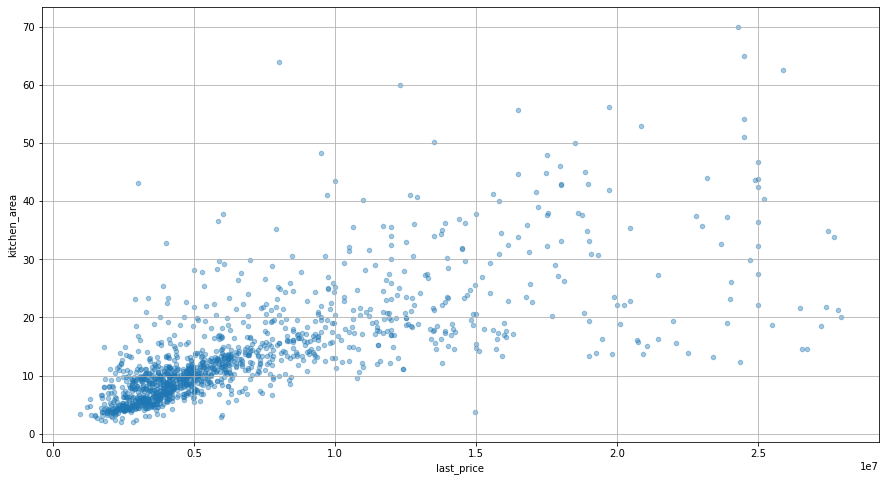

In [76]:
price_kitchen_area.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.4, figsize = (15,8), grid=True)

Коэффициент корреляции Пирсона = 0.73 - малая взаимосвязь между ценой и площадью кухни. По графику мы видим что цена квартир может расти, а площадь кухни оставаться без изменений. Т.е площадь кухни мало влияет на цену квартиры.

##### Зависимость цены квартиры от этажа, на котором расположена квартира

<AxesSubplot:xlabel='floor_category'>

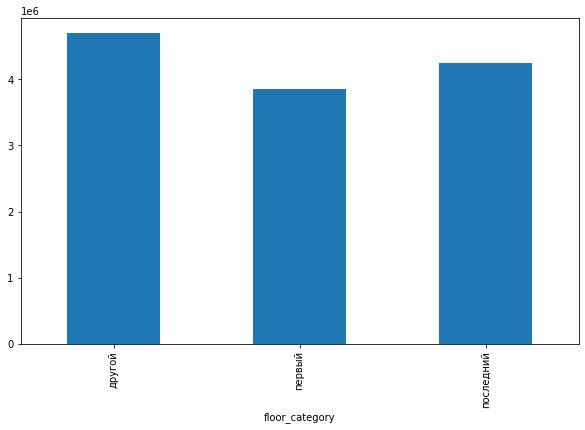

In [77]:
data.groupby('floor_category')['last_price'].median().plot(kind='bar', figsize = (10,6))

In [78]:
data['floor'].value_counts().head()

2    2585
3    2405
1    2244
4    2160
5    2022
Name: floor, dtype: int64

По графику видно что первый этаж ценится меньше чем остальные и средняя цена на квартиры находящиеся на первом этаже, ниже. Квартиры на последнем этаже ценятся чуть ниже чем распаоложенные на остальных этажах(не первых), но это скорее всего потому что предложений с квартирами на последнем этаже гораздо меньше чем квартир расположенных на остальных этажах. 

##### Зависимость цены квартиры от дня недели размещения

<AxesSubplot:xlabel='weekday'>

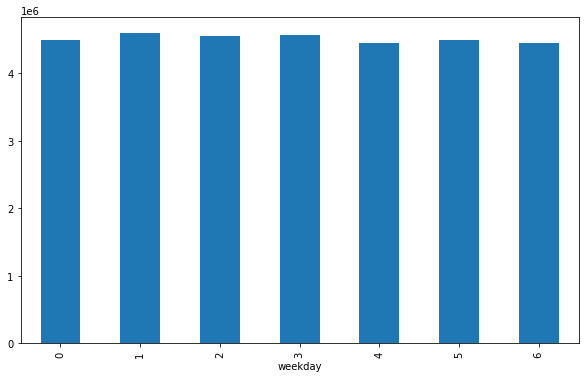

In [79]:
data.groupby('weekday')['last_price'].median().plot(kind='bar', figsize = (10,6))

Зависимость цены квартиры от дня недели видна на графике. Дороже всего цены на квартиры размещенные в середине недели - вторник, среда и четверг.

##### Зависимость цены квартиры от месяца размещения

<AxesSubplot:xlabel='month_publication'>

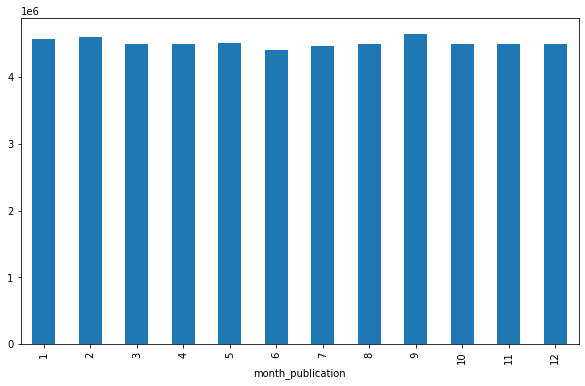

In [80]:
data.groupby('month_publication')['last_price'].median().plot(kind='bar', figsize = (10,6))

Цены на квартиры зависят и от месяца размещения объявлений. Самые высокие цены устанавливают в сентябре и феврале. Самые низкие цены на квартиры в июне.

##### Зависимость цены квартиры от года размещения

<AxesSubplot:xlabel='year_publication'>

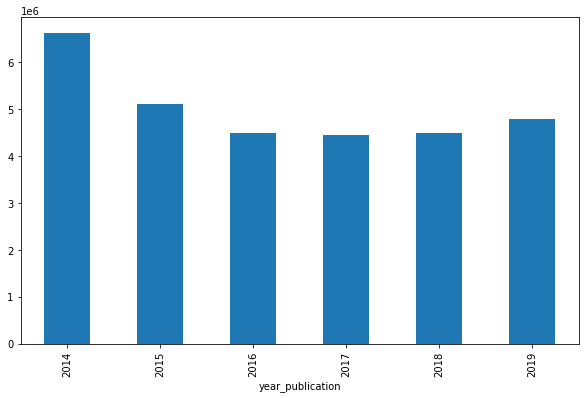

In [81]:
data.groupby('year_publication')['last_price'].median().plot(kind='bar', figsize = (10,6))

Цены на квартиры меняюся по годам. Самые высокие цены на квартиры зафиксированы в 2014 году, потом цена снижалась до 2017 года, после начала немного расти.

####  1. Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений  2. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра

In [82]:
top_local_name = data.pivot_table(index='locality_name', values='price_per_meter', aggfunc=['count', 'mean']).reset_index()
top_local_name.columns = ['locality_name', 'ads_count', 'adv_price_per_meter']
top_local_name.sort_values(by='ads_count', ascending = False).head(10)

,locality_name,ads_count,adv_price_per_meter
195,Санкт-Петербург,12461,"108,222"
128,Мурино,515,"85,584"
94,Кудрово,397,"94,118"
259,Шушары,372,"78,178"
32,Всеволожск,309,"68,517"
177,Пушкин,287,"101,810"
82,Колпино,275,"75,016"
149,Парголово,266,"89,844"
40,Гатчина,245,"67,459"
33,Выборг,180,"56,887"


In [83]:
max_local_name = top_local_name.sort_values(by='adv_price_per_meter', ascending = False).head(1)
display(max_local_name)

min_local_name = top_local_name.sort_values(by='adv_price_per_meter', ascending = False).tail(1)
display(min_local_name)

,locality_name,ads_count,adv_price_per_meter
195,Санкт-Петербург,12461,"108,222"


,locality_name,ads_count,adv_price_per_meter
219,Старополье,2,"11,309"


Больше всего объявлений по продаже квартир в Санкт-Петербурге - 12461, со средней ценой квадратного метра - 108222 руб, она же является самой высокой. Самая низкая стоимость квадратного метра в Старополье - 11309 руб.

#### Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

In [84]:
price_per_km = (data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest != -1').pivot_table(index='distance', values='price_per_meter', aggfunc=['count', 'mean'])).reset_index()
price_per_km.columns = ['distance', 'count_price', 'mean_price_per_km']
price_per_km.head(10)

,distance,count_price,mean_price_per_km
0,0,54,"132,409"
1,1,165,"128,226"
2,2,223,"119,407"
3,3,379,"113,729"
4,4,669,"128,748"
5,5,529,"128,952"
6,6,324,"125,260"
7,7,313,"126,374"
8,8,517,"117,399"
9,9,564,"108,298"


<AxesSubplot:xlabel='distance'>

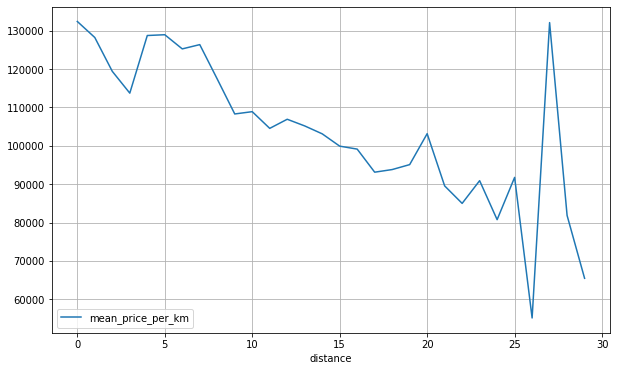

In [85]:
price_per_km.plot(x='distance', y='mean_price_per_km', grid=True, figsize = (10,6))

На графике особо заметно аномальное значение стоимости квадратного метра на расстоянии от центра города - 27 км. Это Репино в Курортном районе, там много элитной недвижимости, поэтому стоимость выше чем в центре Санкт-Петербурга.

<AxesSubplot:xlabel='distance'>

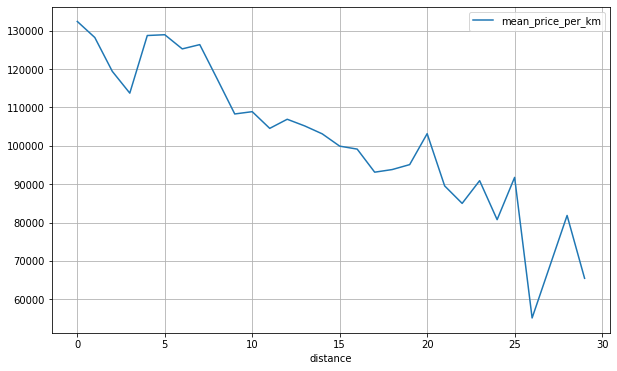

In [86]:
data=data[data['distance'] != 27] # Удвлим аномальное значение и построим график без него
price_per_km = (data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest != -1').pivot_table(index='distance', values='price_per_meter', aggfunc=['count', 'mean'])).reset_index()
price_per_km.columns = ['distance', 'count_price', 'mean_price_per_km']
price_per_km.plot(x='distance', y='mean_price_per_km', grid=True, figsize = (10,6))

Без аномального значения все равно видим что зависимость не примо-линейная. В основном стоимость объектов в центре дороже чем на окраинах, и она постепенно снижается удаляясь от центра города, но могут встречатся и много других факторов которые влияют на стоимость квартир, пусть даже находящихся не в центре.

### Общий вывод

В результате выполения проекта мной были изучены предоставленные данные сервиса Яндекс.Недвижимость, выполнена их предобработка: найдены и устранены пропуски, дубликаты, аномальные и выбивающиеся значения. Проведен исследовательский анализ данных и выявлено что:
1. Самое большое количество квартир продается за 90 дней, самый большой пик - более 2500 объявлений. Около 700 квартир продаются за 60 дней, примерно столько же квартир продаются за 45 дней. Также встречаются квартиры которые продаются намного дольше 90 дней, на это скорее всего влияет много побочных факторов.
2. С увеличением количества комнат, увеличивается и цена квартиры.
3. Зависимость цены квартиры от общей площади достаточно высокая, цена растет с увеличением общей площади в квартире.
4. Зависимость цены квартиры от жилой площади также можно назвать высокой, но эта зависимость уже чуть ниже чем от общей площади. С увеличением жилой площади в квартире цена растет.
5. Зависимость цены квартиры от площади кухни плослеживается достаточно слабо. Т.е можно сказать что площадь кухни мало влияет на цену квартиры.
6. Квартиры расположенные на первом этаже ценятся и стоят дешевле, чем квартиры расположенные на остальных этажах.
7. Также можно заметить зависимость стоимости квартиры в от дня недели размещения: обычно цены на квартиры размещенные в начале недели выше, чем на квартиры размещенные ближе к концу недели.
8. Цены на квартиры зависят и от месяца размещения объявлений. Самые высокие цены устанавливают в апреле. Самые низкие цены на квартиры в июне.
9. В Санкт-Петербурге средняя цена одного квадратного метра равна 110920 руб, в то время как в Репино она на порядок выше - 175000 руб, хотя Репино расположено в 27 км от центра Санкт-Петербурга. А например в населенном пункте Совхозный средняя цена одного квадратного метра почти в 9 раз меньше чем в Санкт-Петербурге и составляет всего 12555 руб.
10. Но в основном стоимость квартир в центре дороже чем на окраинах. Чем дальше квартира находится от центра города, тем ниже ее стоимость. Но при этом могут встречатся и редкие аномальные значения в стоимости, но на них могут влиять прочие факторы.